
                   
#                       *Klasifikacija Pasa*


Cilj ovog istraživačkog rada je proučavanje i analiza primene tehnika mašinskog učenja, uključujući duboko učenje, za rešavanje problema obrade fotografija.
Projekat se fokusira na klasifikaciju rasa pasa, gde je razvijen model sposoban za prepoznavanje rase psa na osnovu date slike.
Podaci za obuku modela sastoje se od slika pasa, organizovanih u šest foldera: "Bedlington_terrier", "Bernese_mountain_dog", "Dandie_Dinmont", "Gordon_setter", "Ibizan_hound" i "Norwegian_elkhound".
Cilj rada je iskoristiti dostupne podatke i primeniti tehnike mašinskog učenja, posebno dubokog učenja, kako bismo izgradili efikasan model koji će tačno klasifikovati rase pasa na osnovu novih fotografija. Ovakav model može imati potencijalnu primenu u različitim oblastima, kao što su unapređenje sistema za pronalaženje izgubljenih pasa, praćenje životinjskih populacija i slično.


#                             Klasifikacija


Klasifikacija je ključna tehnika u mašinskom učenju, posebno u zadacima koji uključuju prepoznavanje obrazaca i donošenje odluka. Proces klasifikacije uključuje nekoliko koraka: prikupljanje i priprema podataka, odabir odgovarajućeg algoritma, obuka modela, evaluacija performansi i primena modela na nove podatke.

U obuci modela, slike ili drugi podaci se koriste za treniranje algoritma da prepozna različite klase. Ovi algoritmi mogu biti jednostavni, poput logističke regresije, ili složeni, kao što su neuronske mreže korišćene u dubokom učenju. Nakon obuke, model se evaluira na skupu podataka koji nisu korišćeni tokom treninga kako bi se procenila njegova tačnost i sposobnost generalizacije.

Klasifikacioni modeli imaju široku primenu, uključujući medicinsku dijagnostiku, filtriranje neželjene pošte, prepoznavanje lica, analizu teksta i mnoge druge oblasti. Njihova sposobnost da automatski identifikuju i kategorizuju informacije čini ih neophodnim alatima u modernoj analitici podataka i veštačkoj inteligenciji.






Izradu projekta započinjemo instaliranjem Python paketka "gdown" koji omogućava preuzimanje datoteka sa Google Drive-a putem komandne linije.

In [ ]:

!pip install gdown

 Zatim ovaj kod preuzima ZIP datoteku sa Google Drive-a i čuva je u lokalnom direktorijumu.

In [ ]:


import gdown

url = 'https://drive.google.com/uc?id=1v6aQDKSOBlsufA4wwImuur7CJO2AHonS'
output = '/content/Dog_Breed_Classification_2.zip'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1v6aQDKSOBlsufA4wwImuur7CJO2AHonS
To: /content/Dog_Breed_Classification_2.zip
100%|██████████| 9.68M/9.68M [00:00<00:00, 27.8MB/s]


'/content/Dog_Breed_Classification_2.zip'

Raspakujemo ZIP datoteku Dog_Breed_Classification_2.zip u trenutni direktorijum.







In [ ]:

!unzip Dog_Breed_Classification_2.zip

Archive:  Dog_Breed_Classification_2.zip
  inflating: data/Bedlington_terrier/Bedlington_terrier_1.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_10.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_100.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_101.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_102.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_103.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_104.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_105.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_106.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_107.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_108.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_109.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_11.jpg  
  inflating: data/Bedlington_terrier/Bedlington_terrier_110.jpg  
  inflating: data/Bedlington_terrier/Be

Uvozimo potrebne biblioteke za rad sa nizovima(numpy), slikama (PIL.Image), i ZIP datotekama (zipfile). Definišemo funkciju normalize_images_from_zip koja:
otvara ZIP datoteku, iterira kroz zadate foldere unutar ZIP datoteke.
Učitava, menja veličinu (na 224x224 piksela), i normalizuje slike (vrednosti piksela skalirane na opseg 0-1), prikuplja normalizovane slike, njihove oznake (etikete) i imena fajlova.
Poziva funkciju sa specifikovanim putanjama do ZIP datoteke i folderima koji sadrže slike različitih rasa pasa.
Čuva rezultate (normalizovane slike, oznake i imena fajlova) u promenljive.


In [ ]:
import numpy as np
from PIL import Image
import zipfile

def normalize_images_from_zip(zip_path, folders):
    normalized_images = []
    labels = []
    fileNames = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for label, folder in enumerate(folders):
            print(label)
            print(folder)
            file_list = zip_ref.namelist()
            for file in file_list:
                if file.startswith(folder) and file.endswith('.jpg'):
                    with zip_ref.open(file) as img_file:
                        fileNames.append(img_file.name)
                        img = Image.open(img_file)
                        img = img.resize((image_width, image_height))
                        img_array = np.array(img)
                        normalized_img = img_array / 255.0
                        normalized_images.append(normalized_img)
                        labels.append(label)
    return normalized_images, labels, fileNames


zip_path = '/content/Dog_Breed_Classification_2.zip'

folders = ["data/Bedlington_terrier", "data/Bernese_mountain_dog", "data/Dandie_Dinmont", "data/Gordon_setter", "data/Ibizan_hound", "data/Norwegian_elkhound"]

image_width = 224
image_height = 224

normalized_images, labels, fileNames = normalize_images_from_zip(zip_path, folders)

0
data/Bedlington_terrier
1
data/Bernese_mountain_dog
2
data/Dandie_Dinmont
3
data/Gordon_setter
4
data/Ibizan_hound
5
data/Norwegian_elkhound


Uvozimo TensorFlow biblioteku koja omogućava korišćenje prethodno obučenih modela u TensorFlow-u.



In [ ]:

import tensorflow as tf
import tensorflow_hub as hub


Ovaj kod koristi funkciju print kako bi ispisao verzije TensorFlow i TensorFlow Hub biblioteka u trenutnoj Python sesiji.

In [ ]:
print("Verzija TensorFlow biblioteke:", tf.__version__)
print("Verzija TensorFlow Hub biblioteke:", hub.__version__)

Verzija TensorFlow biblioteke: 2.15.0
Verzija TensorFlow Hub biblioteke: 0.16.1


Koristimo Image klasu iz IPython.display biblioteke kako bi prikazao sliku u Jupyter notebook-u.

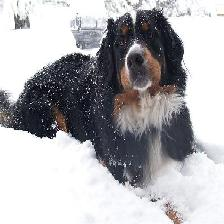

In [ ]:
from IPython.display import display, Image
Image("/content/data/Bernese_mountain_dog/Bernese_mountain_dog_10.jpg")

Prikazuje prvih 10 imena fajlova. Prikazivanjem prvih 10 imena fajlova možemo dobiti uvid u strukturu imenovanja fajlova ili proveriti da li su pravilno učitani.

In [ ]:
fileNames[:10]


['data/Bedlington_terrier/Bedlington_terrier_1.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_10.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_100.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_101.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_102.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_103.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_104.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_105.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_106.jpg',
 'data/Bedlington_terrier/Bedlington_terrier_107.jpg']

Ova linija koda koristi Image klasu iz IPython.display biblioteke kako bi prikazala sliku koja se nalazi na putanji specificiranoj u listi fileNames na indeksu 33. Ovo je korisno za pregled slika direktno u Jupyter notebook-u.

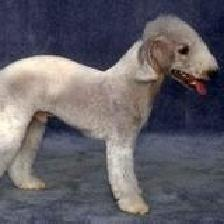

In [ ]:
from IPython.display import Image
Image(fileNames[33])


Ova funkcija breed uzima ime fajla i vraća naziv rase pasa na osnovu putanje fajla koja je prethodno izdvojena iz fileNames liste

In [ ]:
def breed(fileName):
    parts=fileName.split('/')
    return parts[1]


print(breed(fileNames[555]))

Ibizan_hound



Ova funkcija breed_label prima indeks u fileNames listi i koristi funkciju breed da bi dobila naziv rase psa na osnovu putanje fajla koja se nalazi na tom indeksu.

In [ ]:

def breed_label(index):
   return breed(fileNames[index])


print(breed_label(50))

Bedlington_terrier


Učitavamo biblioteku "numpy" koja će biti korisna za manipulaciju podacima, kao i za izgradnju i treniranje modela mašinskog učenja.

In [ ]:
import numpy as np

unique_breeds = np.unique(labels)
len(unique_breeds)

6


Ova linija koda kreira listu boolean_labels koja sadrži boolean vrednosti (True ili False) za svaku oznaku u listi labels, u odnosu na jedinstvene rase pasa u unique_breeds.

In [ ]:
boolean_labels = [label == unique_breeds for label in labels ]



Ovaj kod prikazuje prvih dva elementa liste boolean_labels, što će nam dati uvid u to kako izgledaju te vrednosti

In [ ]:
boolean_labels[:2]


[array([ True, False, False, False, False, False]),
 array([ True, False, False, False, False, False])]

Ove linije koda dodeljuju vrednosti fileNames promenljivoj X i boolean_labels promenljivoj y.

In [ ]:
X = fileNames
y = boolean_labels

Ako je labels[0] jednako nekoj od rasa pasa iz unique_breeds, ova izjava će biti True. U suprotnom, ako se prva oznaka ne poklapa ni sa jednom rasom iz unique_breeds, rezultat će biti False.

In [ ]:
labels[0] == unique_breeds


array([ True, False, False, False, False, False])


Ova linija koda koristi funkciju imread iz biblioteke matplotlib.pyplot kako bi učitala sliku sa putanje fileNames[22] i smešta je u promenljivu image. Nakon toga, koristi se atribut shape da bi se saznale dimenzije slike, odnosno broj redova, kolona i broj kanala slike.

Rezultat će biti trojka brojeva koja predstavlja dimenzije slike. Na primer, ako je rezultat (height, width, channels), to znači da slika ima height redova, width kolona i channels kanala.

In [ ]:
from matplotlib.pyplot import imread
image = imread(fileNames[22])
image.shape

(224, 224, 3)

array([[[173, 185, 113],
        [174, 186, 114],
        [175, 187, 115],
        ...,
        [158, 179,  88],
        [158, 179,  88],
        [159, 180,  89]],

       [[172, 184, 112],
        [172, 184, 112],
        [174, 186, 114],
        ...,
        [157, 178,  87],
        [158, 179,  88],
        [158, 179,  88]],

       [[171, 183, 111],
        [171, 183, 111],
        [173, 185, 113],
        ...,
        [156, 177,  86],
        [156, 177,  86],
        [157, 178,  87]],

       ...,

       [[130, 144,  82],
        [128, 142,  80],
        [138, 152,  90],
        ...,
        [ 23,  42,  10],
        [ 47,  64,  32],
        [ 71,  88,  56]],

       [[ 96, 112,  49],
        [146, 162,  99],
        [148, 164, 101],
        ...,
        [ 32,  51,  19],
        [ 48,  65,  33],
        [ 61,  78,  46]],

       [[111, 127,  64],
        [133, 149,  86],
        [124, 140,  77],
        ...,
        [ 53,  72,  40],
        [ 29,  46,  14],
        [ 49,  66,  34]]], dtype=uint8)
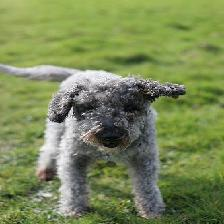

In [ ]:
image


Pretvaranje slike u TensorFlow tenzor.

In [ ]:
tf.constant(image)[:2]


<tf.Tensor: shape=(2, 224, 3), dtype=uint8, numpy=
array([[[173, 185, 113],
        [174, 186, 114],
        [175, 187, 115],
        ...,
        [158, 179,  88],
        [158, 179,  88],
        [159, 180,  89]],

       [[172, 184, 112],
        [172, 184, 112],
        [174, 186, 114],
        ...,
        [157, 178,  87],
        [158, 179,  88],
        [158, 179,  88]]], dtype=uint8)>

funkcija process_image prima putanju do slike i izvršava sledeće korake:
čita binarni sadržaj slike sa putanje,
dekodira sliku u formatu JPEG u RGB tenzor,
konvertuje vrednosti piksela slike u tip podataka tf.float32,
menja veličinu slike na željenu dimenziju, često korišćenu u modelima mašinskog učenja.

In [ ]:
image_size = 224

def process_image(image_path):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[image_size, image_size])
  return image

Ova funkcija get_image_labels prima putanju do slike i odgovarajuću oznaku (labelu) i izvršava sledeće korake:

Poziva funkciju process_image kako bi obradila sliku i pripremila je za korišćenje u modelu mašinskog učenja i
vraća obrađenu sliku i odgovarajuću oznaku (labelu) kao izlaz funkcije.

In [ ]:
def get_image_labels(image_path, label):
  image = process_image(image_path)
  return image, label

Ovaj izraz kombinuje funkciju process_image sa indeksom 34 iz liste putanja X i indeksom 34 iz liste boolean oznaka y. Ova kombinacija daje tuple koji sadrži obrađenu sliku i odgovarajuću boolean oznaku za određenu sliku. Ovo je korisno za pripremu ulaznih i izlaznih podataka za treniranje modela mašinskog učenja.

In [ ]:
(process_image(X[34]), tf.constant(y[34]))


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.10196079, 0.0509804 , 0.01568628],
         [0.10196079, 0.0509804 , 0.01568628],
         [0.10196079, 0.0509804 , 0.01568628],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.01176471, 0.01176471, 0.01176471],
         [0.00392157, 0.00392157, 0.00392157]],
 
        [[0.10980393, 0.05882353, 0.02352941],
         [0.10588236, 0.05490196, 0.01960784],
         [0.10196079, 0.0509804 , 0.01568628],
         ...,
         [0.02352941, 0.02352941, 0.02352941],
         [0.01568628, 0.01568628, 0.01568628],
         [0.00784314, 0.00784314, 0.00784314]],
 
        [[0.1137255 , 0.0627451 , 0.02745098],
         [0.10980393, 0.05882353, 0.02352941],
         [0.10588236, 0.05490196, 0.01960784],
         ...,
         [0.01960784, 0.01960784, 0.01960784],
         [0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.4039216 , 0.34901962

Ova funkcija show_20_images prikazuje 20 slika zajedno sa odgovarajućim oznakama rase pasa. Slučajno se bira početni indeks između 0 i 600, a zatim se prikazuju 20 slika počevši od tog indeksa. Svaka slika se prikazuje u okviru 5 redova i 5 kolona, sa naslovom koji odgovara rasi psa. Oznake ose su isključene kako bi se dobio čistiji prikaz slika. Ova funkcija je korisna za brz pregled slika i njihovih oznaka.

In [ ]:
import matplotlib.pyplot as plt
import random

def show_20_images(images, labels):
  plt.figure(figsize=(10,10))
  rnd = random.randint(0,600)
  j = 0
  for i in range(rnd, rnd+20):
    ax = plt.subplot(5,5,j+1)
    j=j+1
    plt.imshow(images[i])
    plt.title(breed_label(i))
    plt.axis("off")


Ova funkcija create_batches prima listu putanja do slika X i opcionu listu oznaka y, i kreira pakete podataka za treniranje ili testiranje. Koraci ukratko su:

Kreiranje TensorFlow Dataset objekta koristeći from_tensor_slices, koji sadrži putanje do slika i odgovarajuće oznake ako su dostupne.
Primena funkcije get_image_labels na svaki element skupa podataka kako bi se slika obradila.
Formiranje paketa podataka koristeći batch funkciju, gde svaki paket sadrži batch_size broj primera.
Vraćanje dobijenih paketa podataka

In [ ]:
batch_size = 32

def create_batches(X, y=None, batch_size=batch_size):
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
      data_batch = data.map(get_image_labels).batch(batch_size)
      return data_batch


Ova linija koda koristi funkciju create_batches kako bi kreirala pakete podataka za validacioni skup. Prilikom poziva funkcije, prosleđuju se liste putanja do slika X i oznaka y. Rezultujući paketi podataka će biti korišćeni za validaciju modela mašinskog učenja.

In [ ]:
valid_data = create_batches(X, y)



Ova linija koda vraća specifikaciju elemenata validacionog skupa podataka, što nam daje informacije o strukturi podataka u tom skupu.

In [ ]:
valid_data.element_spec


(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 6), dtype=tf.bool, name=None))


Ova linija koda prikazuje 20 slika iz skupa normalized_images zajedno sa odgovarajućim oznakama iz labels. Ova funkcija je korisna za vizuelnu proveru podataka pre nego što se oni koriste za treniranje ili testiranje modela mašinskog učenja.

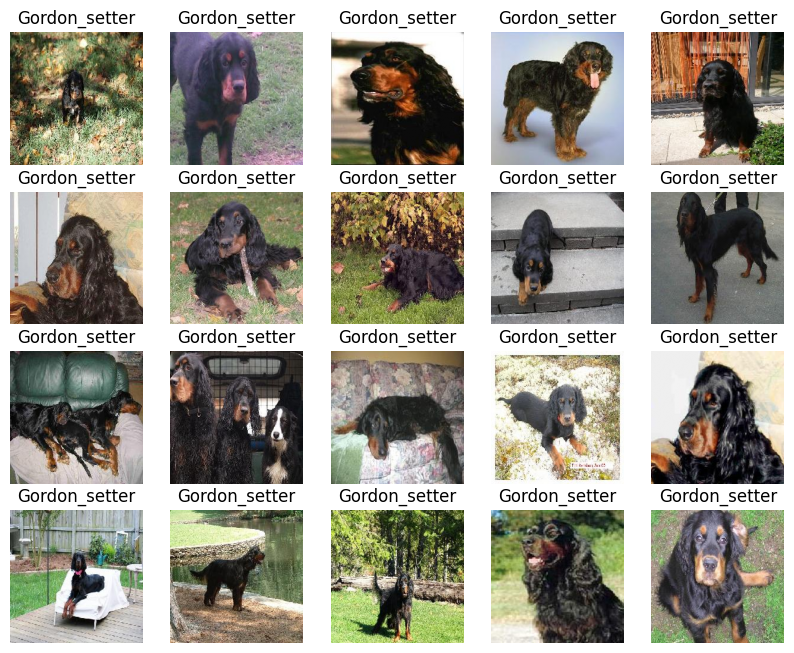

In [ ]:
show_20_images(normalized_images, labels)



Ove linije koda postavljaju dimenzije ulaznih i izlaznih podataka modela, kao i URL adresu modela koji će se koristiti.

In [ ]:
input_shape = [None, image_size, image_size, 3]
output_shape = len(unique_breeds)
Model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Ova funkcija create_model kreira model mašinskog učenja koristeći prethodno definisane dimenzije ulaznih i izlaznih podataka, kao i URL adresu modela koji će se koristiti. Ovde je kratko objašnjenje šta svaki deo funkcije radi:

Kreira se sekvenčni model model koji koristi hub.KerasLayer za učitavanje prethodno obučenog modela sa URL adrese model_url.
Dodaje se gusti sloj (Dense) sa brojem izlaznih jedinica jednakim output_shape i aktivacijom softmax.
Definiše se gubitak kao kategorički unakrsni entropijski gubitak, optimizator kao Adam i metrike kao tačnost.
Model se kompajlira sa navedenim postavkama.
Konačno, model se "build"-uje sa ulaznom dimenzijom input_shape i vraća.

In [ ]:
def create_model(input_shape=input_shape, output_shape=output_shape, model_url = Model_url):
  print("Building model with: ", model_url)

  model = tf.keras.Sequential([hub.KerasLayer(model_url),
                               tf.keras.layers.Dense(units = output_shape, activation="softmax")])
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  model.build(input_shape)
  return model


Ovo kreira model mašinskog učenja koristeći funkciju create_model() i zatim prikazuje detaljan pregled strukture modela korišćenjem metode summary().

In [ ]:
model = create_model()
model.summary()


Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 6)                 6012      
                                                                 
Total params: 5438725 (20.75 MB)
Trainable params: 6012 (23.48 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


Ova komanda omogućava korišćenje TensorBoard alata unutar Jupyter bilježnice, što omogućava analizu i vizualizaciju performansi modela mašinskog učenja.

In [ ]:
%load_ext tensorboard


Ova funkcija tensorboard_callback kreira povratni poziv (callback) za TensorBoard koji će se koristiti tokom treniranja modela. Evo šta ova funkcija radi:

Definiše se direktorijum za čuvanje logova TensorBoard-a koji sadrži trenutni datum i vreme kao deo svog imena.
Kreira se povratni poziv (TensorBoard callback) koji će pratiti performanse modela i čuvati logove u navedenom direktorijumu.
Ova funkcija je korisna za automatsko praćenje i čuvanje metrika tokom treniranja modela, što omogućava kasniju analizu pomoću TensorBoard alata.







In [ ]:
import datetime
import os

def tensorboard_callback():
  logdir = os.path.join("/content/data/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


Ova linija koda kreira povratni poziv (callback) za rano zaustavljanje (EarlyStopping) koji će pratiti validacionu tačnost modela i zaustaviti proces treniranja ako se tačnost ne poboljšava tokom određenog broja epoha. Evo kako funkcija radi:

monitor='val_accuracy': Postavlja se metrika koja se prati tokom treniranja. U ovom slučaju, praćena je tačnost na validacionom skupu podataka.
patience=3: Definiše se broj epoha koje treba sačekati bez poboljšanja pre nego što se proces treniranja zaustavi. Ako se tačnost na validacionom skupu ne poboljšava tokom 3 uzastopne epohe, treniranje će se zaustaviti.

In [ ]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)



Ova promenljiva Num_epochs postavlja broj epoha koje će se koristiti tokom treniranja modela na 25. Epoha predstavlja jednu iteraciju kroz ceo skup podataka tokom treniranja. Time se definiše koliko puta će se model trenirati na celokupnom skupu podataka.

In [ ]:
Num_epochs=25



Ove linije koda koriste model za predviđanje rezultata na validacionom skupu podataka valid_data. Evo šta svaki deo koda radi:

predictions = model.predict(valid_data, verbose=1): Ova linija koda koristi model.predict funkciju da generiše predviđanja na validacionom skupu podataka valid_data. verbose=1 postavlja režim verbose na nivo 1, što znači da će se prikazati napredak predviđanja tokom izvršavanja.
predictions: Ova promenljiva sadrži rezultate predviđanja koje je model generisao za validacioni skup podataka.
Ovo je korisno za procenu performansi modela na neviđenim podacima i evaluaciju njegovih prediktivnih sposobnosti.

In [ ]:
predictions = model.predict(valid_data, verbose=1)
predictions


24/24 [==============================] - 49s 2s/step


array([[0.23988143, 0.05696729, 0.03345388, 0.31104758, 0.32105204,
        0.03759778],
       [0.04173295, 0.08326229, 0.3016863 , 0.15932651, 0.26465115,
        0.14934073],
       [0.03093018, 0.05195831, 0.03296874, 0.2241145 , 0.62315345,
        0.03687491],
       ...,
       [0.02609274, 0.24695034, 0.10444055, 0.07222217, 0.41545928,
        0.13483493],
       [0.01022574, 0.6201683 , 0.13431396, 0.0970861 , 0.08848754,
        0.04971833],
       [0.01556161, 0.32939962, 0.10675223, 0.4033931 , 0.10300772,
        0.04188574]], dtype=float32)


Ovaj kod definiše funkciju get_prediction_label(prediction_probabilities) koja vraća oznaku predikcije na osnovu niza verovatnoća predikcije koji se prosleđuje funkciji kao argument. Linija prediction_label = get_prediction_label(predictions[0]) poziva tu funkciju za prvu predikciju u nizu predikcija predictions i smešta rezultat u promenljivu prediction_label.

In [ ]:

def get_prediction_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]
prediction_label = get_prediction_label(predictions[0])
prediction_label

4


Ovaj kod definiše funkciju unbatchify(data) koja razdvaja podatke koji su u batch-u nazad u pojedinačne slike i oznake. Za svaki uzorak u podacima, funkcija uzima sliku i oznaku, dodaje ih u odvojene liste i zatim vraća te liste slika i oznaka.

Nakon što se funkcija definiše, koristi se za izdvajanje slika i oznaka iz valid_data, smeštajući ih u valid_images i valid_labels. Zatim se prikazuje prva slika i oznaka iz ovih izdvojenih podataka.

In [ ]:
def unbatchify(data):
  images=[]
  labels=[]
  cnt = 0
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(breed_label(cnt))
    cnt = cnt+1
  return images, labels
valid_images, valid_labels = unbatchify(valid_data)
valid_images[0], valid_labels[0]

(array([[[0.43529415, 0.40000004, 0.27058825],
         [0.43529415, 0.40000004, 0.27058825],
         [0.43921572, 0.4039216 , 0.27450982],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.4431373 , 0.40784317, 0.2784314 ],
         [0.44705886, 0.41176474, 0.28235295],
         [0.44705886, 0.41176474, 0.28235295],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        [[0.45882356, 0.42352945, 0.29411766],
         [0.45882356, 0.42352945, 0.29411766],
         [0.46274513, 0.427451  , 0.29803923],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],
 
        ...,
 
        [[0.19607845, 0.1137255 , 0.00784314],
         [0.19607845, 0.1137255 , 0.     


Ova funkcija plot_prediction koristi se za prikazivanje slike i pripadajuće predikcije u obliku grafikona. Evo šta radi svaki deo ove funkcije:

pred_prob, label, image = prediction_prob[n], labels[n], images[n]: Izdvaja verovatnoće predikcije (pred_prob), stvarnu oznaku (label) i sliku (image) za n-tu instancu.

pred_label = get_prediction_label(pred_prob): Koristi se funkcija get_prediction_label da bi se dobila predviđena oznaka na osnovu verovatnoća predikcije.

plt.imshow(image): Prikazuje sliku.

plt.xticks([]) i plt.yticks([]): Uklanja oznake na x i y osi.

Ukoliko je predikcija tačna, naslov slike će biti zelen, u suprotnom će biti crven.

plt.title("{}{:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, label), color=color): Postavlja naslov grafikona koji se sastoji od predviđene oznake, tačnosti predikcije u procentima i stvarne oznake. Tačnost predikcije se određuje kao najveća verovatnoća izražena u procentima. Boja naslova se postavlja u zavisnosti od tačnosti predikcije.

In [ ]:

def plot_prediction(prediction_prob, labels, images, n=1):
  pred_prob, label, image = prediction_prob[n], labels[n], images[n]
  pred_label = get_prediction_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == label:
    color="green"
  else:
    color="red"

  plt.title("{}{:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, label), color=color)

In [ ]:
full_data = create_batches(X, y)

In [ ]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5



full_model_tensorboard je callback funkcija za TensorBoard koji omogućava praćenje performansi modela kroz vizualizaciju tokom treninga.

full_model_earlystop je callback funkcija EarlyStopping koja automatski prekida trening ako se određena metrika (u ovom slučaju, tačnost) ne poboljša tokom zadatog broja epoha (u ovom slučaju, tri epohe). Ovo je korisno za sprečavanje prenaučenosti i štedi vreme tokom treninga.

In [ ]:

full_model_tensorboard = tensorboard_callback()
full_model_earlystop = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)


Ovaj kod koristi full_model da trenira na full_data skupu podataka. Očekuje se da će trening trajati Num_epochs epoha (u ovom slučaju 50). Takođe se koriste callback funkcije full_model_tensorboard i full_model_earlystop koje smo prethodno definisali kako bi se omogućilo praćenje performansi modela tokom treninga kroz TensorBoard vizualizaciju i kako bi se automatski zaustavio trening ako se tačnost modela ne poboljša tokom tri uzastopne epohe.

In [ ]:
Num_epochs=50
full_model.fit(full_data, epochs=Num_epochs, callbacks=[full_model_tensorboard, full_model_earlystop])


Epoch 1/50
24/24 [==============================] - 41s 1s/step - loss: 2.1500 - accuracy: 0.2593
Epoch 2/50
24/24 [==============================] - 34s 1s/step - loss: 0.0972 - accuracy: 0.9880
Epoch 3/50
24/24 [==============================] - 36s 1s/step - loss: 0.0536 - accuracy: 0.9934
Epoch 4/50
24/24 [==============================] - 35s 1s/step - loss: 0.0395 - accuracy: 0.9947
Epoch 5/50
24/24 [==============================] - 35s 1s/step - loss: 0.0299 - accuracy: 0.9973
Epoch 6/50
24/24 [==============================] - 34s 1s/step - loss: 0.0236 - accuracy: 0.9987
Epoch 7/50
24/24 [==============================] - 35s 1s/step - loss: 0.0193 - accuracy: 0.9987
Epoch 8/50
24/24 [==============================] - 35s 1s/step - loss: 0.0161 - accuracy: 0.9987
Epoch 9/50
24/24 [==============================] - 45s 2s/step - loss: 0.0138 - accuracy: 1.0000
Epoch 10/50
24/24 [==============================] - 35s 1s/step - loss: 0.0119 - accuracy: 1.0000
Epoch 11/50
24/24 [

Ovaj kod čuva model full_model u datoteku full-model.h5 na lokaciji /content/data/. Ovaj format datoteke (.h5) je često korišćen za čuvanje modela u TensorFlow-u jer podržava čuvanje strukture modela, težina i konfiguracija. Kasnije možete ponovo učitati ovaj model koristeći funkciju load_model iz tensorflow.keras.models

In [ ]:
full_model.save('/content/data/full-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Ovaj deo koda se koristi za generisanje listi putanja do slika koje želite da testirate. os.listdir(test_path) vraća listu imena svih fajlova i direktorijuma u datom direktorijumu. Zatim se svakom od tih imena fajlova dodaje putanja do direktorijuma test_path, što rezultira punim putanjama do svake slike.

Na kraju, test_filenames[:10] prikazuje prvih 10 putanja iz generisane liste. Ovo je korisno za pregledavanje putanja pre nego što počnete sa obradom slika.

In [ ]:
test_path = "/content/data/Bedlington_terrier/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['/content/data/Bedlington_terrier/Bedlington_terrier_4.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_5.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_135.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_66.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_13.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_46.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_25.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_23.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_122.jpg',
 '/content/data/Bedlington_terrier/Bedlington_terrier_62.jpg']


Ovaj kod vrši evaluaciju modela full_model na validacionim podacima valid_data. Metoda evaluate se koristi za izračunavanje gubitka (loss) i metrika modela na zadatom skupu podataka.

Međutim, ovaj kod može izazvati grešku ukoliko struktura valid_data nije odgovarajuća za evaluaciju. Za evaluaciju modela, obično se koristi par slika i odgovarajućih oznaka. Ako valid_data nije u tom formatu, možda ćete morati prilagoditi ili pretvoriti podatke pre evaluacije.

In [ ]:


full_model.evaluate(valid_data)

24/24 [==============================] - 95s 1s/step - loss: 0.0083 - accuracy: 1.0000


[0.00833894219249487, 1.0]


Ovaj kod koristi model full_model da bi napravio predikcije na validacionim podacima valid_data korišćenjem funkcije predict. Rezultat su predikcije koje su smeštene u promenljivu predictions.

In [ ]:
predictions = full_model.predict(valid_data, verbose=1)
predictions

24/24 [==============================] - 35s 1s/step


array([[7.0876205e-01, 3.6460135e-02, 2.2377262e-01, 1.0346970e-02,
        1.0689267e-02, 9.9689821e-03],
       [9.9995273e-01, 9.4660018e-06, 8.8602937e-06, 1.2416480e-06,
        1.9401816e-05, 8.2905899e-06],
       [9.9962300e-01, 2.7935661e-05, 2.0448782e-04, 2.1181126e-05,
        5.8926533e-05, 6.4638822e-05],
       ...,
       [3.7453534e-05, 1.8068845e-04, 2.6862372e-05, 1.6203466e-04,
        4.0212632e-05, 9.9955279e-01],
       [3.1230692e-04, 7.3735893e-05, 4.2140469e-04, 4.4241999e-04,
        2.4483207e-04, 9.9850523e-01],
       [2.4108549e-04, 4.8375243e-04, 1.0280827e-02, 3.2564037e-04,
        3.9964024e-04, 9.8826909e-01]], dtype=float32)

Ovaj poziv funkcije plot_prediction koristi se za prikazivanje predikcije za n-tu instancu u validacionim podacima. Argumenti koje prosleđujete su:

predictions: Predikcije koje je model napravio na validacionim podacima.
valid_labels: Stvarne oznake (klase) za svaku instancu u validacionim podacima.
valid_images: Slike koje su korišćene za validaciju.
n: Indeks instance za koju želite da prikažete predikciju.
Ova funkcija će prikazati sliku, predikciju modela i stvarnu oznaku za izabranu instancu. Naslov slike će biti obojen zeleno ako je predikcija tačna, odnosno crveno ako nije.

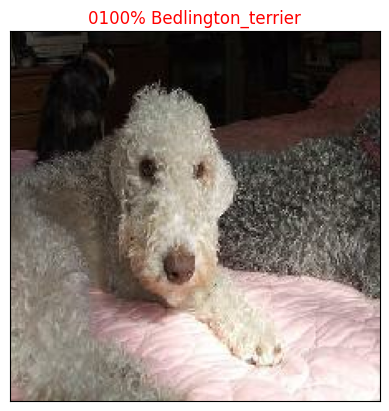

In [ ]:
plot_prediction(predictions, valid_labels, valid_images, n=3)

Funkcija plot_prediction_configuration prikazuje konfiguraciju predikcije za određenu instancu. Evo šta radi:

Izdvaja verovatnoće predikcije i stvarnu oznaku za n-tu instancu.
Koristi funkciju get_prediction_label za dobijanje predviđene oznake na osnovu verovatnoća.
Pronalazi indekse 10 najverovatnijih predikcija.
Izdvaja vrednosti verovatnoća i odgovarajuće oznake za te predikcije.
Prikazuje trakasti grafikon (bar plot) sa verovatnoćama za 10 najverovatnijih predikcija, sa oznakama na x-osi.
Ako je stvarna oznaka među 10 najverovatnijih predikcija, boja odgovarajuće trake biće postavljena na zelenu.

In [ ]:
def plot_prediction_configuration(prediction_prob, labels, n=1):
  pred_prob, label = prediction_prob[n], labels[n]
  pred_label = get_prediction_label(pred_prob)
  top_10_prediction_indx = pred_prob.argsort()[-10:][::-1]
  top_10_prediction_values = pred_prob[top_10_prediction_indx]
  top_10_prediction_labels = unique_breeds[top_10_prediction_indx]

  top_plot = plt.bar(np.arange(len(top_10_prediction_labels)),
                     top_10_prediction_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_prediction_labels)),
              labels = top_10_prediction_labels,
              rotation='vertical')
  if np.isin(label, top_10_prediction_labels):
    top_plot[np.argmax(top_10_prediction_labels==label)].set_color("green")

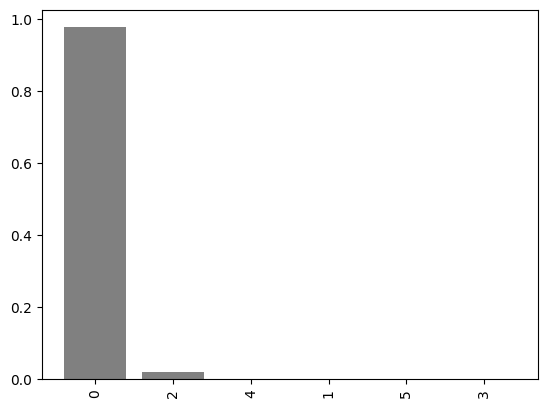

In [ ]:
plot_prediction_configuration(predictions, valid_labels, n=15)


Ovaj kod generiše mrežu slika i njihovih predikcija i konfiguracija za više instanci odjednom. U mreži se prikazuje ukupno 50 instanci, organizovanih u 5 redova i 2 kolone. Svaka instanca se sastoji od slike sa jedne strane i grafikona sa verovatnoćama predikcija na drugoj strani.

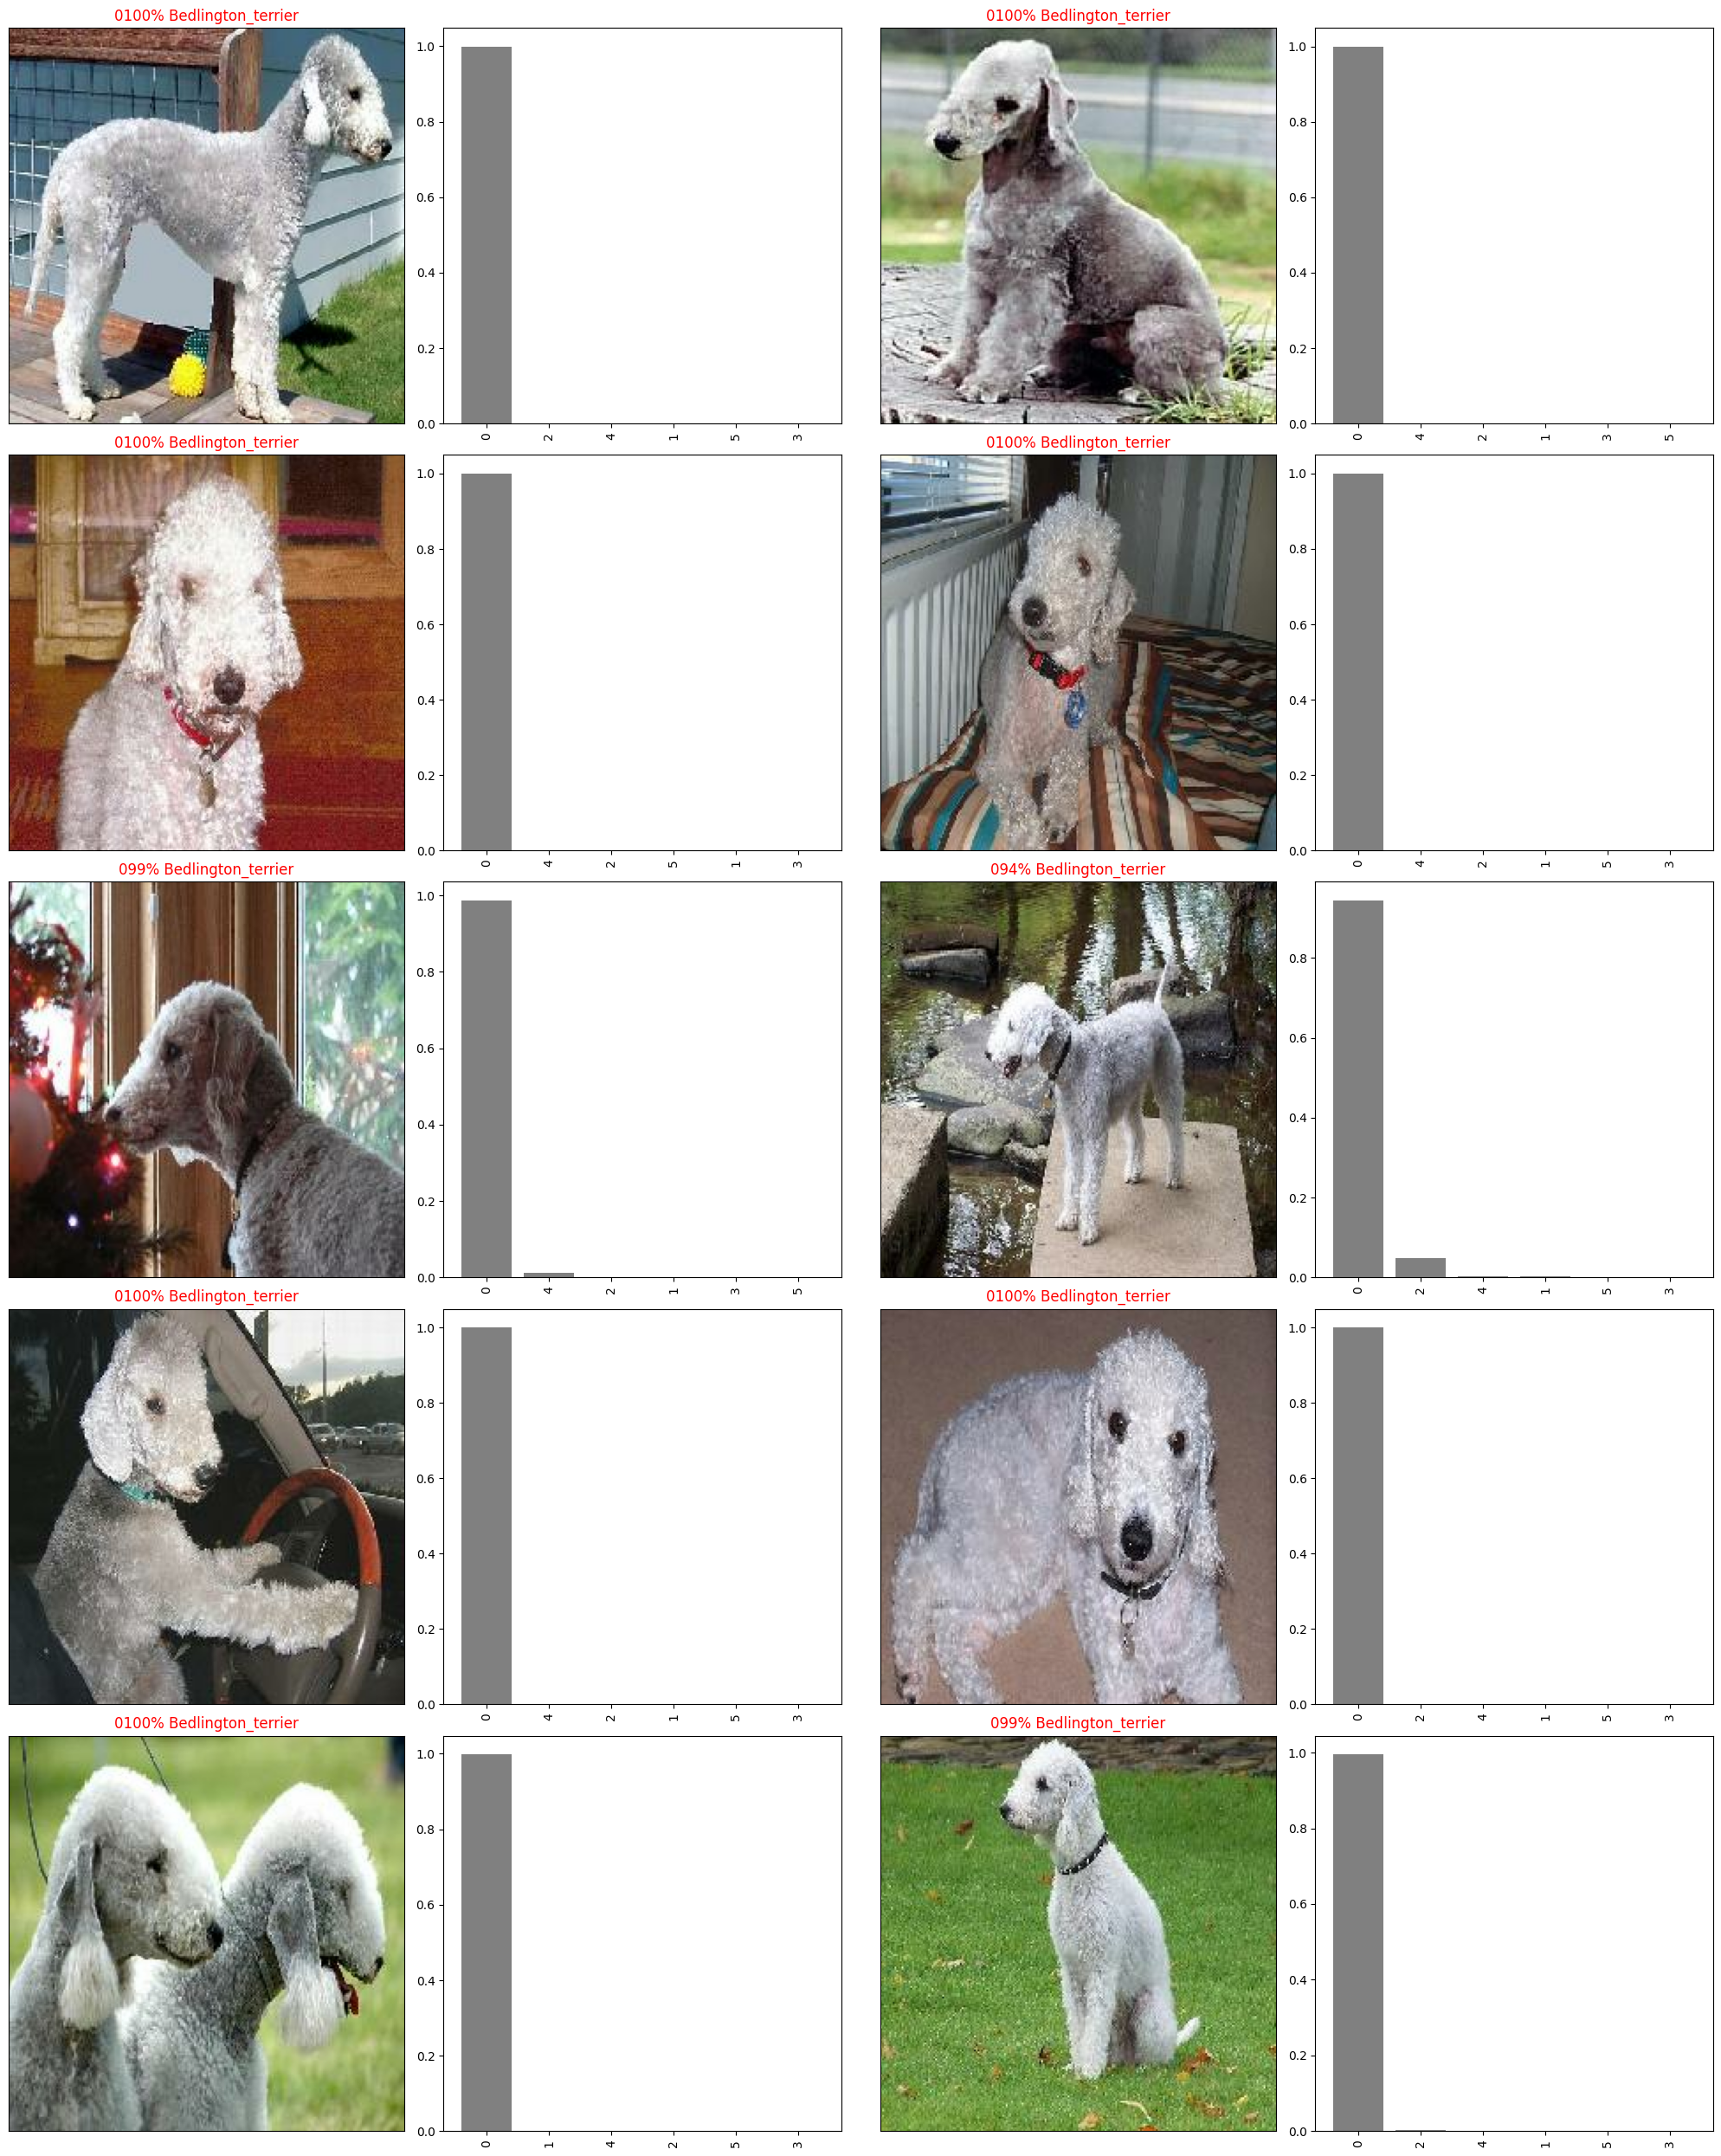

In [ ]:
multiple = 50
row_number = 5
col_number = 2
image_number = row_number*col_number
plt.figure(figsize=(10*col_number, 5*row_number))
for i in range(image_number):
  plt.subplot(row_number, 2*col_number, 2*i+1)
  plot_prediction(predictions, valid_labels, valid_images, i+multiple)
  plt.subplot(row_number, 2*col_number, 2*i+2)
  plot_prediction_configuration(predictions, valid_labels, i+multiple)
plt.tight_layout(h_pad=1.0)
plt.show()



Tokom ovog vremena, istraživali smo različite aspekte analize podataka i mašinskog učenja. Evo nekih ključnih zaključaka:

Priprema podataka je ključna: Kvalitetni podaci su osnova uspešnog modela. To uključuje čišćenje podataka, obradu nedostajućih vrednosti, normalizaciju ili standardizaciju, kao i pripremu podataka za treniranje, validaciju i testiranje.

Izbor modela zavisi od zadatka: Postoji mnogo algoritama za mašinsko učenje, i svaki od njih ima svoje prednosti i mane. Izbor modela zavisi od prirode problema, vrste podataka i ciljeva analize.

Treniranje i evaluacija modela: Važno je pravilno podeliti podatke na skupove za treniranje, validaciju i testiranje. Takođe je važno pratiti performanse modela tokom treniranja i koristiti odgovarajuće metrike evaluacije kako bismo razumeli kako se model ponaša na novim podacima.

Optimizacija hiperparametara: Mnogi modeli imaju hiperparametre koji utiču na performanse modela. Optimizacija ovih hiperparametara može biti ključna za postizanje boljih rezultata.

Vizualizacija rezultata: Vizualizacija je moćan alat za razumevanje podataka i modela. Omogućava nam da bolje razumemo obrasce u podacima, performanse modela i rezultate predikcija.

Uz ovu osnovnu infrastrukturu, možemo eksperimentisati sa različitim algoritmima, optimizovati ih za bolje performanse i kontinuirano učiti i rasti u oblasti analize podataka i mašinskog učenja.






*   Nikola Vejnović IT81-2021
*   Principi Prezentacije i Prepoznavanja oblika

